In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,r2_score

In [143]:
train_data=pd.read_csv('airbnb_listing_train.csv')
test_data=pd.read_csv('airbnb_listing_validate.csv')

train_data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
12896,20757739,Quiet stylish private room 15 mins to city ce...,63932037,Michelle,NaN,De Baarsjes - Oud-West,52.37194,4.84965,Entire home/apt,1,1,13-09-2017,0.03,1,88,65
12897,1055570,"Beautiful, spacious apt. with great views @ IJ...",5813322,Rens,NaN,IJburg - Zeeburgereiland,52.36263,4.98031,Entire home/apt,7,238,25-02-2020,2.75,1,357,160
12898,13178435,Great apartment de Pijp/Albert Cuyp,46370427,Francien,NaN,De Pijp - Rivierenbuurt,52.35719,4.90009,Entire home/apt,3,15,07-10-2018,0.31,1,0,180
12899,21963760,Stylish apartment in an amazing location,4895882,Olaf,NaN,Zuid,52.34855,4.85105,Entire home/apt,2,11,28-04-2019,0.37,1,0,136
12900,33726315,Amsterdam Apartments First Floor,203460948,City,NaN,Centrum-Oost,52.35865,4.89795,Hotel room,5,1,17-02-2020,0.26,11,365,337


In [142]:
train_data.nunique()

id                                12901
name                              12653
host_id                           11601
host_name                          4536
neighbourhood_group                   0
neighbourhood                        22
latitude                           5227
longitude                          7887
room_type                             4
minimum_nights                       56
number_of_reviews                   362
last_review                        1495
reviews_per_month                   610
calculated_host_listings_count       26
availability_365                    366
price                               400
dtype: int64

In [127]:
train_data['host_name'].unique().size

4537

In [126]:
print(train_data.shape)
print(test_data.shape)

(12901, 16)
(6451, 15)


In [83]:
train_data.drop_duplicates()
test_data.drop_duplicates()

train_data.shape

(12901, 16)

In [84]:
train_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

In [85]:
train_data.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [86]:
test_data.isnull().sum()

id                                   0
name                                11
host_id                              0
host_name                            3
neighbourhood_group               6451
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                        796
reviews_per_month                  796
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [87]:
train_data['last_review'].fillna(train_data['last_review'].mode()[0],inplace=True)
train_data['reviews_per_month'].fillna(train_data['reviews_per_month'].mean(),inplace=True)
test_data['last_review'].fillna(test_data['last_review'].mode()[0],inplace=True)
test_data['reviews_per_month'].fillna(test_data['reviews_per_month'].mean(),inplace=True)
train_data.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [88]:
train_data['last_review'].mode()[0]

'08-03-2020'

In [89]:
train_data['last_review']=pd.to_datetime(train_data['last_review'],errors='ignore')
test_data['last_review']=pd.to_datetime(test_data['last_review'],errors='ignore')
train_data.dtypes

c:\Users\91805\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\91805\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-06-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\91805\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\91805\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-02-2020' in DD/MM/YYYY format. Provide format or specif

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
price                                      int64
dtype: object

In [90]:
train_data['last_review'].tail()

12896   2017-09-13
12897   2020-02-25
12898   2018-07-10
12899   2019-04-28
12900   2020-02-17
Name: last_review, dtype: datetime64[ns]

c:\Users\91805\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

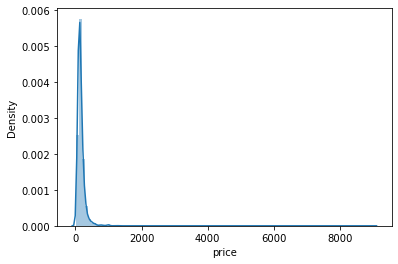

In [91]:
sns.distplot(train_data['price'],bins=100)

In [110]:
train_data=train_data.drop(train_data.index[list((np.where(train_data['price']>900)))])
train_data.shape


c:\Users\91805\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(12838, 16)

In [111]:
x_train=train_data[['neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']]
y_train=train_data['price']
x_test=test_data[['neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']]
print(x_train.shape)
print(x_test.shape)

print(x_test.isnull().sum())
x_train.isnull().sum()

(12838, 10)
(6451, 10)
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [112]:
x_train['neighbourhood'].unique().size

22

In [113]:
print(x_test.isnull().sum())
x_train.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [114]:
dummy_train=pd.get_dummies(x_train[['neighbourhood','room_type']])
dummy_test=pd.get_dummies(x_test[['neighbourhood','room_type']])
x_train.drop(columns=['neighbourhood','room_type'],inplace=True)
x_train=pd.merge(x_train,dummy_train,left_index=True,right_index=True)

x_test.drop(columns=['neighbourhood','room_type'],inplace=True)
x_test=pd.merge(x_test,dummy_test,left_index=True,right_index=True)


C:\Users\91805\AppData\Local\Temp\ipykernel_23100\1598154941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(columns=['neighbourhood','room_type'],inplace=True)
C:\Users\91805\AppData\Local\Temp\ipykernel_23100\1598154941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(columns=['neighbourhood','room_type'],inplace=True)


In [115]:
x_train['last_review_day']=x_train['last_review'].dt.day
x_train['last_review_month']=x_train['last_review'].dt.month
x_train['last_review_year']=x_train['last_review'].dt.year

x_test['last_review_day']=x_test['last_review'].dt.day
x_test['last_review_month']=x_test['last_review'].dt.month
x_test['last_review_year']=x_test['last_review'].dt.year


x_train.drop(columns=['last_review'],inplace=True)
x_test.drop(columns=['last_review'],inplace=True)

In [116]:
x_train.shape

(12838, 36)

In [117]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [118]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [119]:
print('Training score', model.score(x_train,y_train))
print(y_pred)


Training score 0.2155390960428264
[ 5.12511986e+11  1.52802392e+10 -4.70247766e+11 ...  1.15334458e+11
  1.52802392e+10  1.52802391e+10]


In [120]:
op=pd.DataFrame(y_pred,columns=['price by LR'])
op.head()

,price by LR
0,5.125120e+11
1,1.528024e+10
2,-4.702478e+11
3,1.018322e+11
4,-1.920154e+11


In [ ]:
#LR model give less score, trying knn

In [121]:
k_range=range(1,15)
k_score=[]

for k in k_range:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    k_score.append(knn.score(x_train,y_train))
print(k_score)

[1.0, 0.6677170381224165, 0.5410634524231688, 0.47703256212728384, 0.43678552337930143, 0.4081117674361251, 0.38889264495460785, 0.372849208984968, 0.3605143292595411, 0.3519574173197686, 0.34301207807672207, 0.3342243723705294, 0.3253849032127819, 0.3159824832420418]


In [122]:
#k=1
knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [123]:
test_data['price']=y_pred
test_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,12297872,"Great apartment, super location",44144487,Azarakhsh,NaN,De Baarsjes - Oud-West,52.37326,4.86213,Entire home/apt,2,49,2019-09-15,0.990000,1,267,79.0
1,3920205,Lovely apartment in Center south!,7594884,"Ruben, Sarah & Lindy",NaN,De Pijp - Rivierenbuurt,52.35076,4.88866,Entire home/apt,3,34,2019-09-19,0.490000,38,0,116.0
2,26614345,"Sunny family friendly house, centrally located",3903937,Maaike,NaN,Oud-Noord,52.38980,4.90881,Entire home/apt,4,3,2019-04-21,0.130000,1,0,140.0
3,7433172,1 Br Apartment in Old South A'dam,24969223,Quirien,NaN,Zuid,52.34292,4.85962,Entire home/apt,4,0,2020-02-01,0.737602,1,0,175.0
4,17019744,Luxurious house with garden - central location,114138837,Sietse,NaN,Westerpark,52.37321,4.87238,Entire home/apt,2,9,2017-09-24,0.230000,1,0,150.0
